# Self-Driving Car Engineer Nanodegree

## Deep Learning

## Project: Build a Traffic Sign Recognition Classifier

In this notebook, a template is provided for you to implement your functionality in stages, which is required to successfully complete this project. If additional code is required that cannot be included in the notebook, be sure that the Python code is successfully imported and included in your submission if necessary. 

> **Note**: Once you have completed all of the code implementations, you need to finalize your work by exporting the iPython Notebook as an HTML document. Before exporting the notebook to html, all of the code cells need to have been run so that reviewers can see the final implementation and output. You can then export the notebook by using the menu above and navigating to  \n",
    "**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission. 

In addition to implementing code, there is a writeup to complete. The writeup should be completed in a separate file, which can be either a markdown file or a pdf document. There is a [write up template](https://github.com/udacity/CarND-Traffic-Sign-Classifier-Project/blob/master/writeup_template.md) that can be used to guide the writing process. Completing the code template and writeup template will cover all of the [rubric points](https://review.udacity.com/#!/rubrics/481/view) for this project.

The [rubric](https://review.udacity.com/#!/rubrics/481/view) contains "Stand Out Suggestions" for enhancing the project beyond the minimum requirements. The stand out suggestions are optional. If you decide to pursue the "stand out suggestions", you can include the code in this Ipython notebook and also discuss the results in the writeup file.


>**Note:** Code and Markdown cells can be executed using the **Shift + Enter** keyboard shortcut. In addition, Markdown cells can be edited by typically double-clicking the cell to enter edit mode.

---
## Step 0: Load The Data

The dataset is available [here](https://s3-us-west-1.amazonaws.com/udacity-selfdrivingcar/traffic-signs-data.zip).
The data is a pickled dataset and has been resized to 32x32 which is what this model uses.

In [1]:
# Load pickled data
import pickle
import numpy as np

# TODO: Fill this in based on where you saved the training and testing data

training_file = 'train.p'
validation_file= 'valid.p'
testing_file = 'test.p'

with open(training_file, mode='rb') as f:
    train = pickle.load(f)
with open(validation_file, mode='rb') as f:
    valid = pickle.load(f)
with open(testing_file, mode='rb') as f:
    test = pickle.load(f)
    
X_train, y_train = train['features'], train['labels']
X_valid, y_valid = valid['features'], valid['labels']
X_test, y_test = test['features'], test['labels']



---

## Step 1: Dataset Summary & Exploration

The pickled data is a dictionary with 4 key/value pairs:

- `'features'` is a 4D array containing raw pixel data of the traffic sign images, (num examples, width, height, channels).
- `'labels'` is a 1D array containing the label/class id of the traffic sign. The file `signnames.csv` contains id -> name mappings for each id.
- `'sizes'` is a list containing tuples, (width, height) representing the original width and height the image.
- `'coords'` is a list containing tuples, (x1, y1, x2, y2) representing coordinates of a bounding box around the sign in the image. **THESE COORDINATES ASSUME THE ORIGINAL IMAGE. THE PICKLED DATA CONTAINS RESIZED VERSIONS (32 by 32) OF THESE IMAGES**

Complete the basic data summary below. Use python, numpy and/or pandas methods to calculate the data summary rather than hard coding the results. For example, the [pandas shape method](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.shape.html) might be useful for calculating some of the summary results. 

### Provide a Basic Summary of the Data Set Using Python, Numpy and/or Pandas

In [2]:
### Replace each question mark with the appropriate value. 
### Use python, pandas or numpy methods rather than hard coding the results

# TODO: Number of training examples
n_train = X_train.shape[0]

# TODO: Number of validation examples
n_validation = X_valid.shape[0]

# TODO: Number of testing examples.
n_test = X_test.shape[0]

# TODO: What's the shape of an traffic sign image?
image_shape = X_train.shape[1] * X_train.shape[2]

# TODO: How many unique classes/labels there are in the dataset.
n_classes = len(np.unique(y_train))

print("Number of training examples =", n_train)
print("Number of validation examples =", n_validation)
print("Number of testing examples =", n_test)
print("Image data shape =", image_shape)
print("Number of classes =", n_classes)





Number of training examples = 34799
Number of validation examples = 4410
Number of testing examples = 12630
Image data shape = 1024
Number of classes = 43


### Include an exploratory visualization of the dataset

Visualize the German Traffic Signs Dataset using the pickled file(s). This is open ended, suggestions include: plotting traffic sign images, plotting the count of each sign, etc. 

The [Matplotlib](http://matplotlib.org/) [examples](http://matplotlib.org/examples/index.html) and [gallery](http://matplotlib.org/gallery.html) pages are a great resource for doing visualizations in Python.

**NOTE:** It's recommended you start with something simple first. If you wish to do more, come back to it after you've completed the rest of the sections. It can be interesting to look at the distribution of classes in the training, validation and test set. Is the distribution the same? Are there more examples of some classes than others?

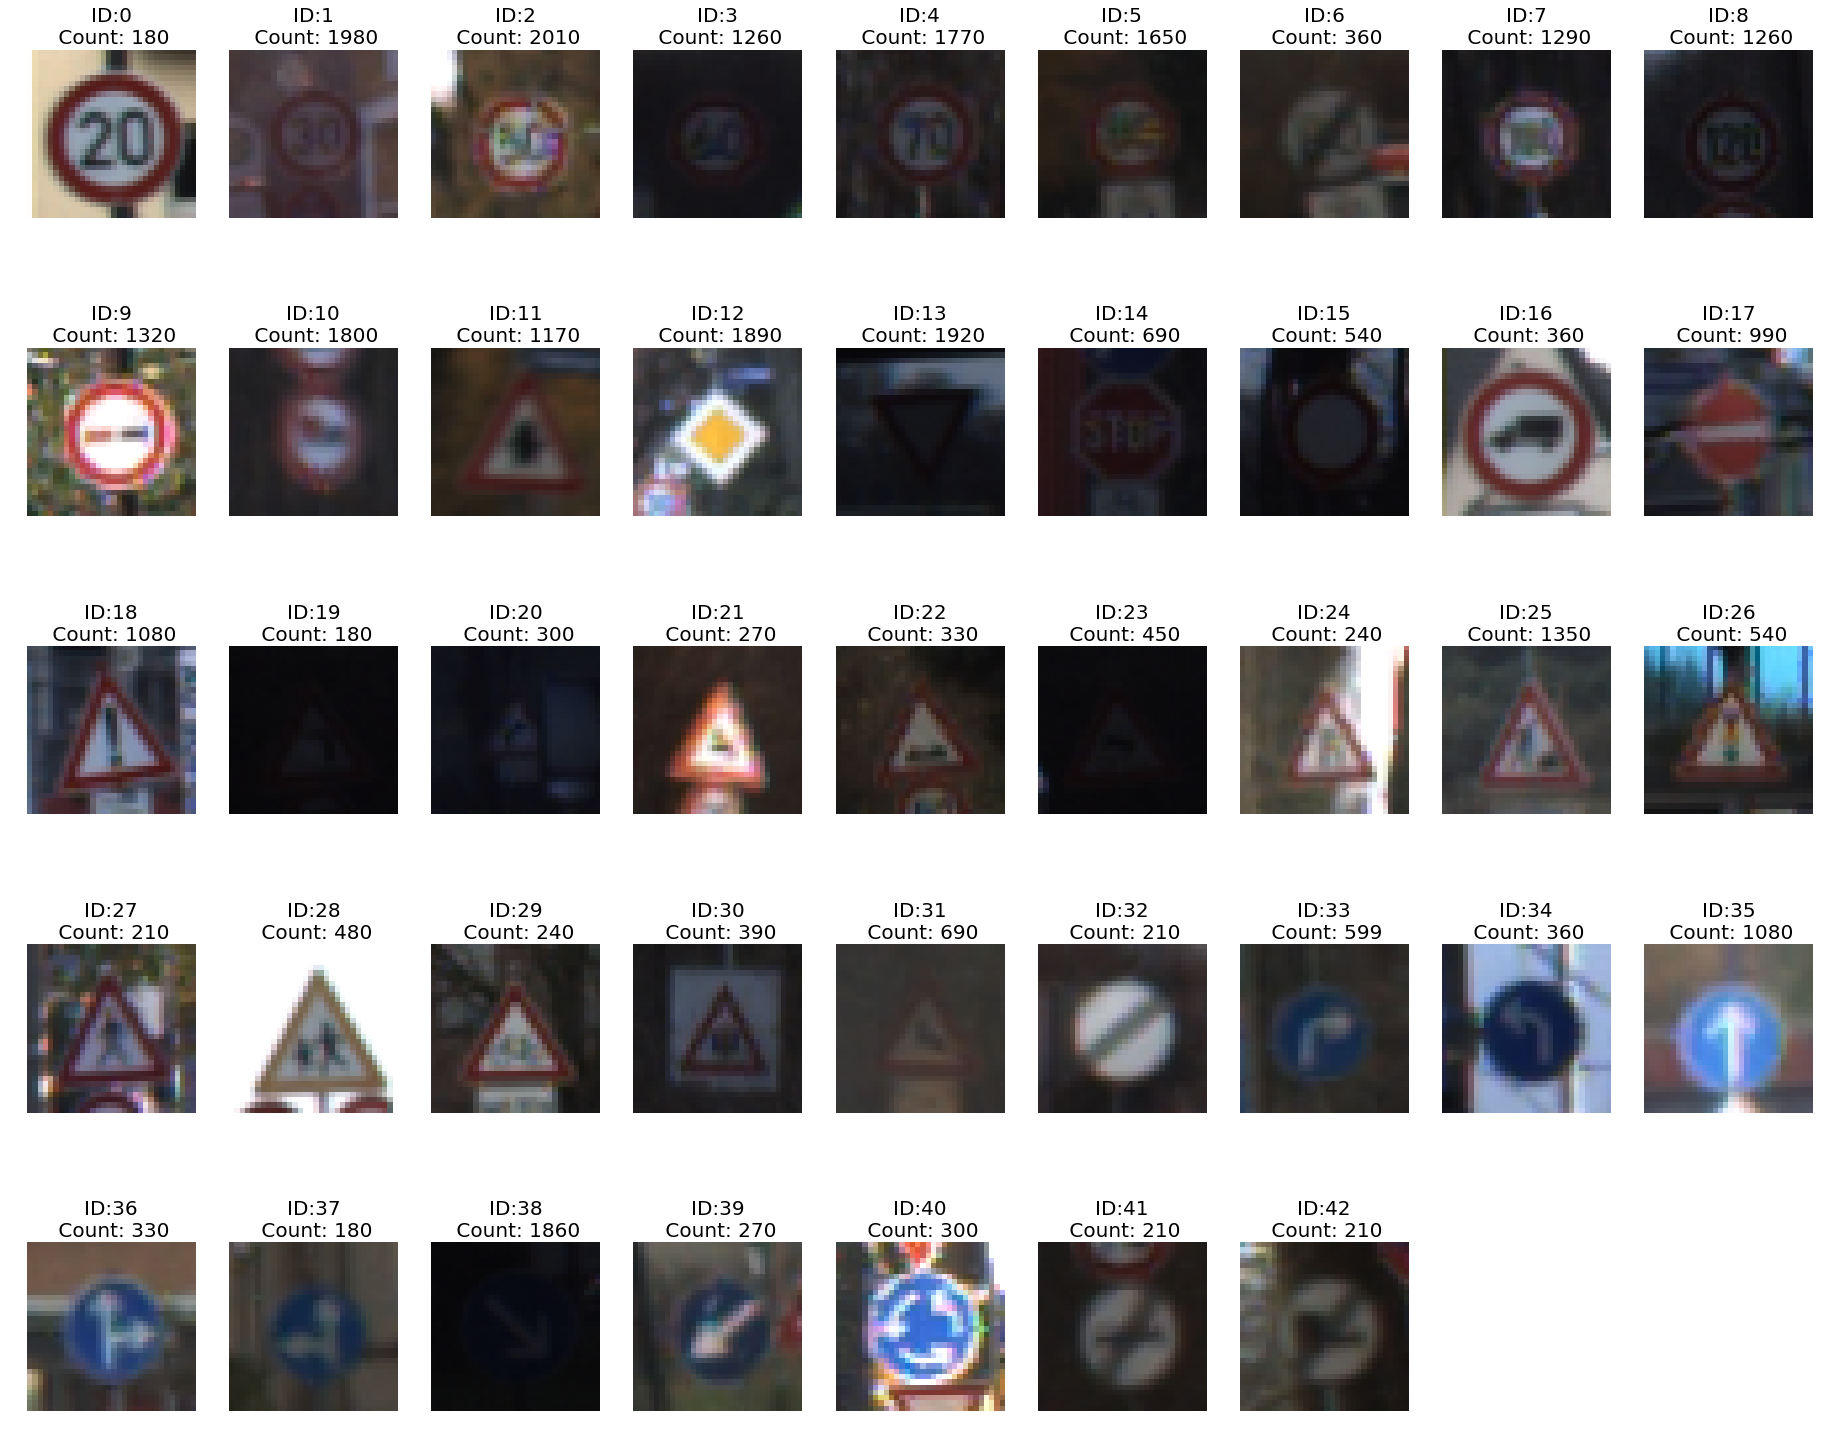

34799


In [101]:
### Data exploration visualization code goes here.
### Feel free to use as many code cells as needed.
import matplotlib.pyplot as plt
plt.rcdefaults()
import numpy as np
import random
from itertools import groupby

# Visualizations will be shown in the notebook.
%matplotlib inline

#Display the 43 different type of traffic signs and their corresponding count.
num_of_samples=[]
totalsum = 0
plt.figure(figsize=(32, 32))
for i in range(0, n_classes):
    plt.subplot(6, 9, i+1)
    x_selected = X_train[y_train == i]
    plt.imshow(x_selected[0, :, :, :])
    label = ('ID:' + str(i) + "\n " + "Count: " + str(len(x_selected)))
    plt.title(label, fontsize = '20')
    plt.axis('off')
    num_of_samples.append(len(x_selected))
plt.show()
print(sum(num_of_samples))

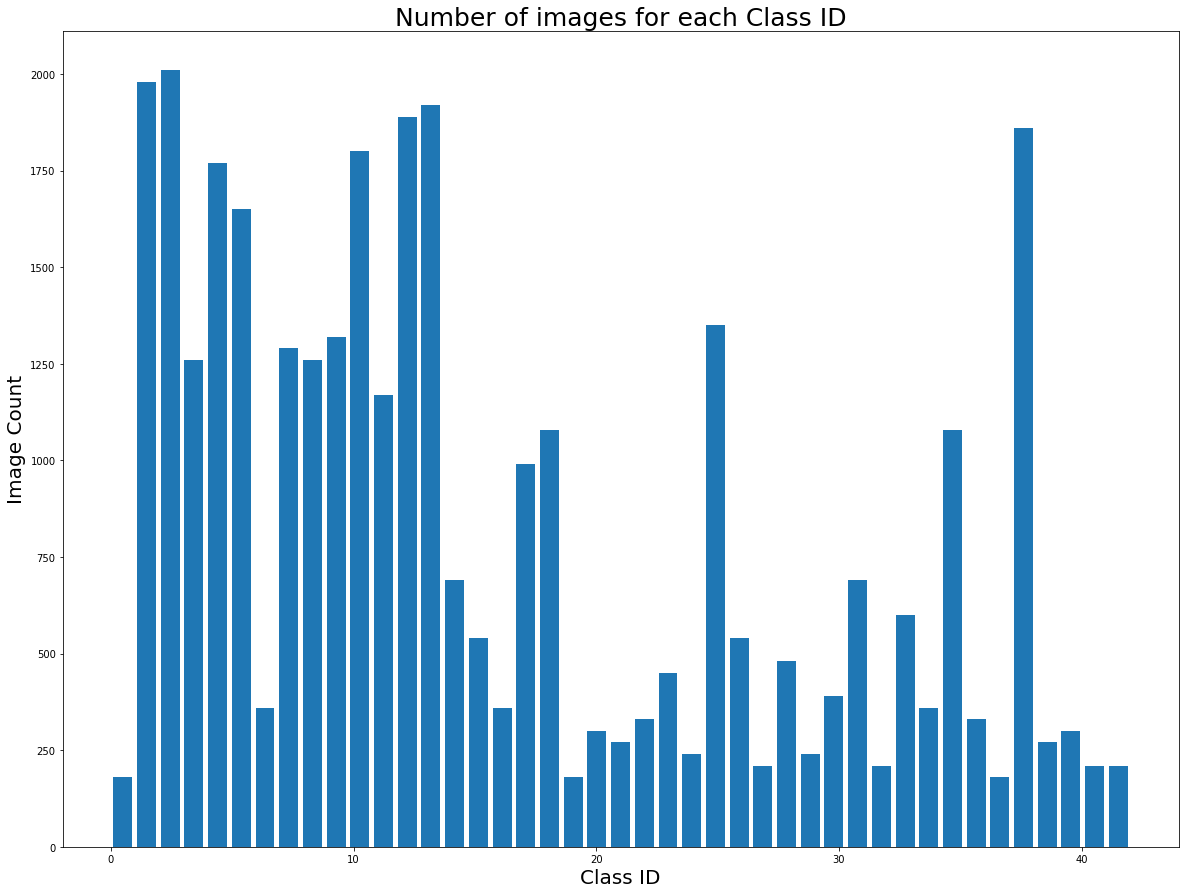

In [125]:

#histogram of the data
hist, bins = np.histogram(y_train, bins=n_classes)
plt.figure(figsize=(20,15))
plt.title("Number of images for each Class ID", fontsize = '25')
plt.xlabel("Class ID", fontsize = '20')
plt.ylabel("Image Count", fontsize = '20')
plt.bar(center, hist, align='center', width=width)
plt.show()




----

## Step 2: Design and Test a Model Architecture

Design and implement a deep learning model that learns to recognize traffic signs. Train and test your model on the [German Traffic Sign Dataset](http://benchmark.ini.rub.de/?section=gtsrb&subsection=dataset).

The LeNet-5 implementation shown in the [classroom](https://classroom.udacity.com/nanodegrees/nd013/parts/fbf77062-5703-404e-b60c-95b78b2f3f9e/modules/6df7ae49-c61c-4bb2-a23e-6527e69209ec/lessons/601ae704-1035-4287-8b11-e2c2716217ad/concepts/d4aca031-508f-4e0b-b493-e7b706120f81) at the end of the CNN lesson is a solid starting point. You'll have to change the number of classes and possibly the preprocessing, but aside from that it's plug and play! 

With the LeNet-5 solution from the lecture, you should expect a validation set accuracy of about 0.89. To meet specifications, the validation set accuracy will need to be at least 0.93. It is possible to get an even higher accuracy, but 0.93 is the minimum for a successful project submission. 

There are various aspects to consider when thinking about this problem:

- Neural network architecture (is the network over or underfitting?)
- Play around preprocessing techniques (normalization, rgb to grayscale, etc)
- Number of examples per label (some have more than others).
- Generate fake data.

Here is an example of a [published baseline model on this problem](http://yann.lecun.com/exdb/publis/pdf/sermanet-ijcnn-11.pdf). It's not required to be familiar with the approach used in the paper but, it's good practice to try to read papers like these.

### Pre-process the Data Set (normalization, grayscale, etc.)

Minimally, the image data should be normalized so that the data has mean zero and equal variance. For image data, `(pixel - 128)/ 128` is a quick way to approximately normalize the data and can be used in this project. 

Other pre-processing steps are optional. You can try different techniques to see if it improves performance. 

Use the code cell (or multiple code cells, if necessary) to implement the first step of your project.




## Design and Test a Model Architecture (Preprocessing) Question 1

The two preprocessing techniques I used were grayscale transformation and normalization. After researching online It's apparent that to get a really high accuracy on the validation set, it's necessary to do some type of data augmentation, especially on the MNIST data set where there are a lot of classes that are not as well represented as other classes. I decided to not use any data augmentation, since I didn't have much time, and I think I can comforably get higher than 93% accuracy with other techniques.

Gray scale transformation is important because it allows several positive effects.

- It's quicker for the computer to process, because we are operating on less information 3 channels to 1.
- It generally makes identifying edges easier, which could be difficult with a color image
- If I want to add data augmentation techniques later on, It's simpler on gray scale images due to less code and faster process time.

Normalization is important because it ensures that the input parameter (pixel) for the network has a similar data distrubution, which means that convergence would be faster when training the network. 




-0.334202189311
-0.334202173791
-1.0026109546
-1.00261095448


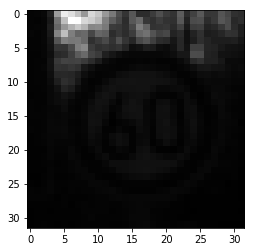

In [131]:
### Preprocess the data here. It is required to normalize the data. Other preprocessing steps could include 
### converting to grayscale, etc.
### Feel free to use as many code cells as needed.
from sklearn.utils import shuffle

def normalize(x):
    return (x.astype(float) - 128) / 128 

#save rgb images for displaying softmax probabilities
X_trainrgb = X_train
y_trainrgb = y_train

# Convert to grayscale using average method
X_train_greyscale = np.sum(X_train/3, axis=3, keepdims=True)
X_valid_greyscale = np.sum(X_valid/3, axis=3, keepdims=True)
X_test_greyscale = np.sum(X_test/3, axis=3, keepdims=True)

#display gray scale image
imgplot = plt.imshow(X_train_greyscale[1000].squeeze(), plt.gray())

#print mean pixel values to check
print(np.mean(X_train_greyscale))
print(np.mean(X_valid_greyscale))

#normalize the pixel values from a range of  -1 to 1
X_train_normalized = normalize(X_train_greyscale) 
X_valid_normalized = normalize(X_valid_greyscale)
X_test = normalize(X_test_greyscale)

#print mean pixel values to check
print(np.mean(X_train_normalized))
print(np.mean(X_valid_normalized))

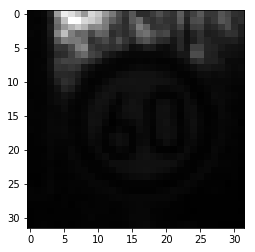

In [132]:
#print same image with normalized values
imgplot = plt.imshow(X_train_normalized[1000].squeeze(), plt.gray())

#shuffle training and validation data
X_train, y_train = shuffle(X_train_normalized, y_train)
X_valid, y_valid = shuffle(X_valid_normalized, y_valid)

## Design and Test a Model Architecture (Model Architecture) Question 2

The architecture I chose to implement was the LeNet5 architecture described in class with a few modifications.

![broken image](lenet5.png "lenet5 architecture")

The LeNet5 architecture has been modified to receive grayscale images and uses dropout.
 - The original LeNet was set to receive color images, this is modified to 32x32x1 because of grayscale
 - There are 2 convolutional layers, 2 max pooling layers, and 3 fully connected layers. The last fully connected layer is the output. This architecture uses 2 dropout rates after 4 layers. 2 of which are after the convolutional layer, and 2 after the first 2 fully connected layers
 - The first layer is a convolutional layer: Input = 32x32x1. Output = 28x28x6. 
   filter width is 5x5, input depth is 1, output depth is 6. The strides are 1 across, 1 down with valid padding.
 - There is a dropout here of 0.8, so 80% of the activations are retained during validation. 100% during testing.
 - The second layer is a max-pooling layer: Input = 28x28x6. Output = 14x14x6.
   filter width is 2x2, The strides are 2 across, 2 down. Padding is valid.
 - The third layer is a convolutional layer: Input = 14x14x6. Output = 10x10x16.
   filter width is 5x5, input depth is 1, output depth is 6. The strides are 1 across, 1 down with valid padding.
 - There is a dropout here of 0.8, so 80% of the activations are retained during validation. 100% during testing.
 - The fourth layer is a max-pooling layer: Input = 10x10x16. Output = 5x5x16
   filter width is 2x2, The strides are 2 across, 2 down. Padding is valid.
 - Then the output is flattened so 5x5x16 becomes 400.
 - The 5th layer is a fully connected layer that takes 400 input and produces 120 ouput.
   There is a dropout here of 0.6, so 60% of the activations are retained during validation. 100% during testing.
 - The 6th layer is a fully connected layer that takes 120 input and produces 84 output.
   There is a dropout here of 0.6, so 60% of the activations are retained during validation. 100% during testing.
 - The final layer is a fully connected layer that takes 84 inputs and produces 43 outputs, one for each type of traffic sign.
 



### Model Architecture

In [8]:
### Define your architecture here.
### Feel free to use as many code cells as needed.

import tensorflow as tf

EPOCHS = 100
BATCH_SIZE = 256


from tensorflow.contrib.layers import flatten

def LeNet(x):    
    
    # Arguments used for tf.truncated_normal, randomly defines variables for the weights and biases for each layer
    mu = 0
    sigma = 0.1
    
    # SOLUTION: Layer 1: Convolutional. Input = 32x32x3. Output = 28x28x6.
    conv1_W = tf.Variable(tf.truncated_normal(shape=(5, 5, 1, 6), mean = mu, stddev = sigma))
    conv1_b = tf.Variable(tf.zeros(6))
    conv1   = tf.nn.conv2d(x, conv1_W, strides=[1, 1, 1, 1], padding='VALID') + conv1_b

    # SOLUTION: Activation.
    conv1 = tf.nn.relu(conv1)
    #dropout at the convolution layer
    conv1 = tf.nn.dropout(conv1, keep_prob1)
    
    # SOLUTION: Pooling. Input = 28x28x6. Output = 14x14x6.
    conv1 = tf.nn.max_pool(conv1, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='VALID')

    # SOLUTION: Layer 3: Convolutional. Input = 14x14x6. Output = 10x10x16.
    conv2_W = tf.Variable(tf.truncated_normal(shape=(5, 5, 6, 16), mean = mu, stddev = sigma))
    conv2_b = tf.Variable(tf.zeros(16))
    conv2   = tf.nn.conv2d(conv1, conv2_W, strides=[1, 1, 1, 1], padding='VALID') + conv2_b
    
    # SOLUTION: Activation.
    conv2 = tf.nn.relu(conv2)
    #dropout at the convolution layer
    conv2 = tf.nn.dropout(conv2, keep_prob1)

    # SOLUTION: Pooling. Input = 10x10x16. Output = 5x5x16.
    conv2 = tf.nn.max_pool(conv2, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='VALID')

    # SOLUTION: Flatten. Input = 5x5x16. Output = 400.
    fc0   = flatten(conv2)
    
    # SOLUTION: Layer 3: Fully Connected. Input = 400. Output = 120.
    fc1_W = tf.Variable(tf.truncated_normal(shape=(400, 120), mean = mu, stddev = sigma))
    fc1_b = tf.Variable(tf.zeros(120))
    fc1   = tf.matmul(fc0, fc1_W) + fc1_b
    
    # SOLUTION: Activation.
    fc1    = tf.nn.relu(fc1)
    #dropout rate for fully connected layer
    fc1 = tf.nn.dropout(fc1, keep_prob2)

    # SOLUTION: Layer 4: Fully Connected. Input = 120. Output = 84.
    fc2_W  = tf.Variable(tf.truncated_normal(shape=(120, 84), mean = mu, stddev = sigma))
    fc2_b  = tf.Variable(tf.zeros(84))
    fc2    = tf.matmul(fc1, fc2_W) + fc2_b
    
    # SOLUTION: Activation.
    fc2    = tf.nn.relu(fc2)
    #dropout rate for fully connected layer
    fc2 = tf.nn.dropout(fc2, keep_prob2)
    
    # SOLUTION: Layer 5: Fully Connected. Input = 84. Output = 43.
    fc3_W  = tf.Variable(tf.truncated_normal(shape=(84, 43), mean = mu, stddev = sigma))
    fc3_b  = tf.Variable(tf.zeros(43))
    logits = tf.matmul(fc2, fc3_W) + fc3_b
    
    return logits


### Train, Validate and Test the Model

A validation set can be used to assess how well the model is performing. A low accuracy on the training and validation
sets imply underfitting. A high accuracy on the training set but low accuracy on the validation set implies overfitting.

## Design and Test a Model Architecture (Moodel Training) Question 3

I experimented with different values for dropout, epochs, learning rate and batch size. I did not modify sigma, mu, filter size and strides or layer size.
I used the optimizer provided in the LeNet lab solution (AdamOptimizer) since it is supposed to be more sophisticated than Stochastic Gradient Descent.

The values I used are as follows.
dropout1: 0.8
dropout2: 0.5
Epochs: 100
BatchSize: 256
learningrate: 0.0001



In [9]:
### Train your model here.
### Calculate and report the accuracy on the training and validation set.
### Once a final model architecture is selected, 
### the accuracy on the test set should be calculated and reported as well.
### Feel free to use as many code cells as needed.

x = tf.placeholder(tf.float32, (None, 32, 32, 1))
y = tf.placeholder(tf.int32, (None))
keep_prob1 = tf.placeholder(tf.float32)
keep_prob2 = tf.placeholder(tf.float32)
one_hot_y = tf.one_hot(y, 43)





In [10]:

rate = 0.001

logits = LeNet(x)
cross_entropy = tf.nn.softmax_cross_entropy_with_logits(labels=one_hot_y, logits=logits)
loss_operation = tf.reduce_mean(cross_entropy)
optimizer = tf.train.AdamOptimizer(learning_rate = rate)
training_operation = optimizer.minimize(loss_operation)



In [11]:

correct_prediction = tf.equal(tf.argmax(logits, 1), tf.argmax(one_hot_y, 1))
accuracy_operation = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
saver = tf.train.Saver()

def evaluate(X_data, y_data, dropout1, dropout2):
    num_examples = len(X_data)
    total_accuracy = 0
    sess = tf.get_default_session()
    for offset in range(0, num_examples, BATCH_SIZE):
        batch_x, batch_y = X_data[offset:offset+BATCH_SIZE], y_data[offset:offset+BATCH_SIZE]
        accuracy = sess.run(accuracy_operation, feed_dict={x: batch_x, y: batch_y, keep_prob1: dropout1, keep_prob2: dropout2})
        total_accuracy += (accuracy * len(batch_x))
    return total_accuracy / num_examples



## Design and Test a Model Architecture (Solution Approach) Question 4

I lowered the learning rate to 0.0001 which needs more Epochs to work, but ultimately I think the model gets trained better.
After about 50 epochs the model was sitting around 91% accuracy, but increasing the epochs to 100 gave me a slight increase in training accuracy to ~93%. 
I experimented with the batchsize from 128 to 256 to 512. I did not notice any increase in training accuracy so I set it to 256.

The dropout feature I think gave me the biggest boost in training accuracy. With grayscale and normalization, I was at ~89%. after increasing the # of epochs and reducing the learning rate I was at around 91%. After adding 2 dropouts after the fully connected layers with(0.5 keep_prob) accuracy increased from 91% to ~93% and after adding 2 more dropouts (0.8 keep_prob) after the convolutional layers accuracy increased from ~93% to ~96%

This is a list describing the accuracy of the model under various parameters.





In [12]:
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    num_examples = len(X_train)
    
    print("Training...")
    print()
    for i in range(EPOCHS):
        X_train, y_train = shuffle(X_train, y_train)
        for offset in range(0, num_examples, BATCH_SIZE):
            end = offset + BATCH_SIZE
            batch_x, batch_y = X_train[offset:end], y_train[offset:end]
            sess.run(training_operation, feed_dict={x: batch_x, y: batch_y, keep_prob1: 0.8, keep_prob2: 0.6})
            
        validation_accuracy = evaluate(X_valid, y_valid, 1.0, 1.0)
        print("EPOCH {} ...".format(i+1))
        print("Validation Accuracy = {:.3f}".format(validation_accuracy))
        print()
        
    saver.save(sess, './lenet')
    print("Model saved")

Training...

EPOCH 1 ...
Validation Accuracy = 0.463

EPOCH 2 ...
Validation Accuracy = 0.735

EPOCH 3 ...
Validation Accuracy = 0.809

EPOCH 4 ...
Validation Accuracy = 0.844

EPOCH 5 ...
Validation Accuracy = 0.873

EPOCH 6 ...
Validation Accuracy = 0.886

EPOCH 7 ...
Validation Accuracy = 0.888

EPOCH 8 ...
Validation Accuracy = 0.911

EPOCH 9 ...
Validation Accuracy = 0.909

EPOCH 10 ...
Validation Accuracy = 0.914

EPOCH 11 ...
Validation Accuracy = 0.927

EPOCH 12 ...
Validation Accuracy = 0.935

EPOCH 13 ...
Validation Accuracy = 0.934

EPOCH 14 ...
Validation Accuracy = 0.936

EPOCH 15 ...
Validation Accuracy = 0.934

EPOCH 16 ...
Validation Accuracy = 0.946

EPOCH 17 ...
Validation Accuracy = 0.946

EPOCH 18 ...
Validation Accuracy = 0.946

EPOCH 19 ...
Validation Accuracy = 0.949

EPOCH 20 ...
Validation Accuracy = 0.949

EPOCH 21 ...
Validation Accuracy = 0.950

EPOCH 22 ...
Validation Accuracy = 0.954

EPOCH 23 ...
Validation Accuracy = 0.953

EPOCH 24 ...
Validation Accura

In [26]:

with tf.Session() as sess:
    saver.restore(sess, "./lenet")

    test_accuracy = evaluate(X_test, y_test, 1.0, 1.0)
    print("Test Accuracy = {:.3f}".format(test_accuracy))

Test Accuracy = 0.941


---

## Step 3: Test a Model on New Images

To give yourself more insight into how your model is working, download at least five pictures of German traffic signs from the web and use your model to predict the traffic sign type.

You may find `signnames.csv` useful as it contains mappings from the class id (integer) to the actual sign name.

### Load and Output the Images

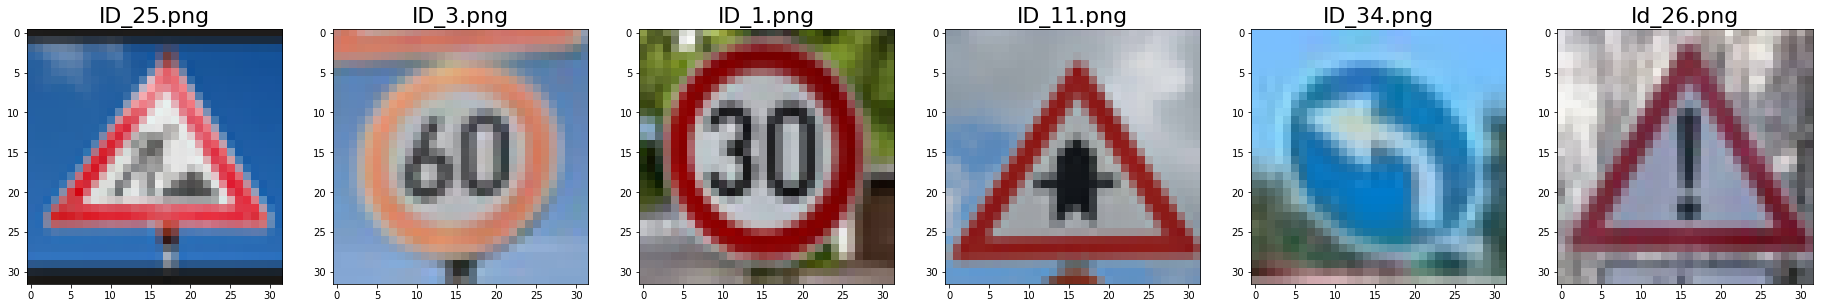

130.694444444
0.0210503472222


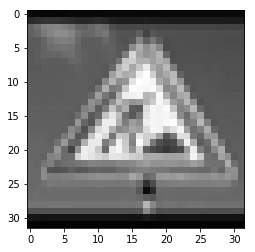

In [28]:
### Load the images and plot them here.
### Feel free to use as many code cells as needed.

import matplotlib.pyplot as pl
import numpy as np
import os
import cv2

custom_images = []
custom_labels = np.array([25,3,1,11,34,26])

fig=plt.figure(figsize=(32, 32))
i = 1
for filename in os.listdir('images/'):
    img = cv2.imread('images/' + filename)
    img = cv2.resize(img, dsize=(32, 32), interpolation=cv2.INTER_CUBIC)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    custom_images.append(img)
    ax = fig.add_subplot(1, 6, i)
    i += 1
    ax.set_title(filename, fontsize=22)
    plt.imshow(img)
plt.show()

def normalize(x):
    return (x.astype(float) - 128) / 128

custom_images = np.array(custom_images)
my_signs_gray = np.sum(custom_images/3, axis=3, keepdims=True)
print(np.mean(my_signs_gray))
my_signs_normalized = normalize(my_signs_gray)
print(np.mean(my_signs_normalized))
imgplot = plt.imshow(my_signs_gray[0].squeeze(), plt.gray())


        



### Predict the Sign Type for Each Image

In [29]:
### Run the predictions here and use the model to output the prediction for each image.
### Make sure to pre-process the images with the same pre-processing pipeline used earlier.
### Feel free to use as many code cells as needed.
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    saver.restore(sess, "./lenet")

    test_accuracy = evaluate(my_signs_normalized, custom_labels, 1.0, 1.0)
    print("Test Accuracy = {:.3f}".format(test_accuracy))


Test Accuracy = 0.833


### Analyze Performance

In [30]:
### Calculate the accuracy for these 5 new images. 
### For example, if the model predicted 1 out of 5 signs correctly, it's 20% accurate on these new images.
my_single_item_array = []
my_single_item_label_array = []

for i in range(6):
    my_single_item_array.append(my_signs_normalized[i])
    my_single_item_label_array.append(custom_labels[i])

    with tf.Session() as sess:
        saver.restore(sess, tf.train.latest_checkpoint('.'))
        
        my_accuracy = evaluate(my_single_item_array, my_single_item_label_array, 1.0, 1.0)
        print('Image {}'.format(i+1))
        print("Image Accuracy = {:.3f}".format(my_accuracy))
        print()
        

Image 1
Image Accuracy = 1.000

Image 2
Image Accuracy = 1.000

Image 3
Image Accuracy = 1.000

Image 4
Image Accuracy = 1.000

Image 5
Image Accuracy = 1.000

Image 6
Image Accuracy = 0.833



### Output Top 5 Softmax Probabilities For Each Image Found on the Web

For each of the new images, print out the model's softmax probabilities to show the **certainty** of the model's predictions (limit the output to the top 5 probabilities for each image). [`tf.nn.top_k`](https://www.tensorflow.org/versions/r0.12/api_docs/python/nn.html#top_k) could prove helpful here. 

The example below demonstrates how tf.nn.top_k can be used to find the top k predictions for each image.

`tf.nn.top_k` will return the values and indices (class ids) of the top k predictions. So if k=3, for each sign, it'll return the 3 largest probabilities (out of a possible 43) and the correspoding class ids.

Take this numpy array as an example. The values in the array represent predictions. The array contains softmax probabilities for five candidate images with six possible classes. `tf.nn.top_k` is used to choose the three classes with the highest probability:

```
# (5, 6) array
a = np.array([[ 0.24879643,  0.07032244,  0.12641572,  0.34763842,  0.07893497,
         0.12789202],
       [ 0.28086119,  0.27569815,  0.08594638,  0.0178669 ,  0.18063401,
         0.15899337],
       [ 0.26076848,  0.23664738,  0.08020603,  0.07001922,  0.1134371 ,
         0.23892179],
       [ 0.11943333,  0.29198961,  0.02605103,  0.26234032,  0.1351348 ,
         0.16505091],
       [ 0.09561176,  0.34396535,  0.0643941 ,  0.16240774,  0.24206137,
         0.09155967]])
```

Running it through `sess.run(tf.nn.top_k(tf.constant(a), k=3))` produces:

```
TopKV2(values=array([[ 0.34763842,  0.24879643,  0.12789202],
       [ 0.28086119,  0.27569815,  0.18063401],
       [ 0.26076848,  0.23892179,  0.23664738],
       [ 0.29198961,  0.26234032,  0.16505091],
       [ 0.34396535,  0.24206137,  0.16240774]]), indices=array([[3, 0, 5],
       [0, 1, 4],
       [0, 5, 1],
       [1, 3, 5],
       [1, 4, 3]], dtype=int32))
```

Looking just at the first row we get `[ 0.34763842,  0.24879643,  0.12789202]`, you can confirm these are the 3 largest probabilities in `a`. You'll also notice `[3, 0, 5]` are the corresponding indices.

4
0.999996


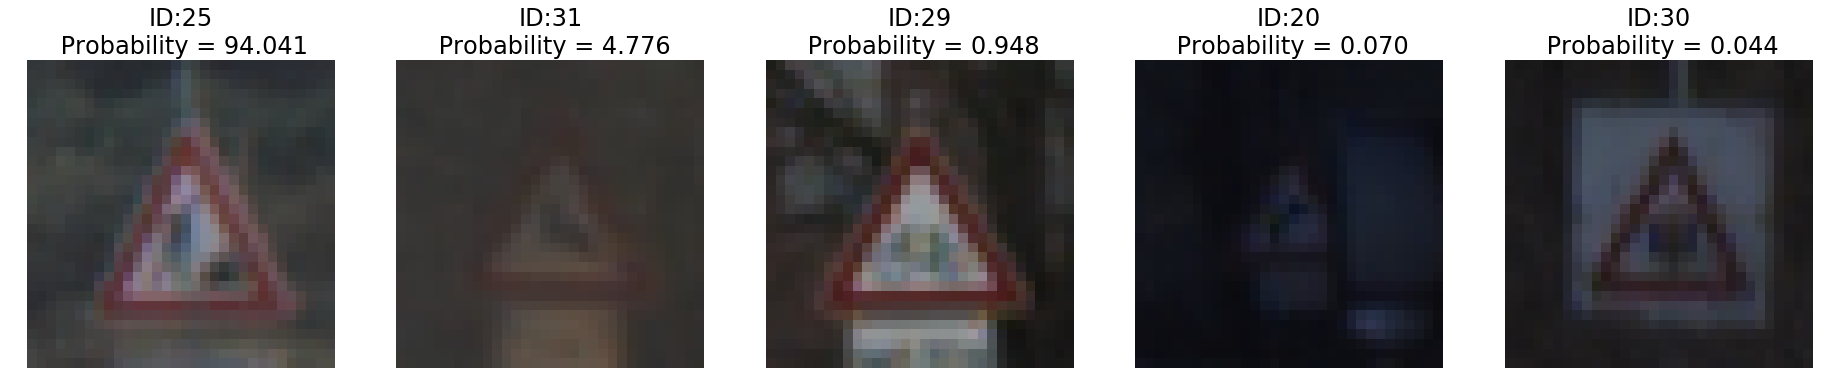

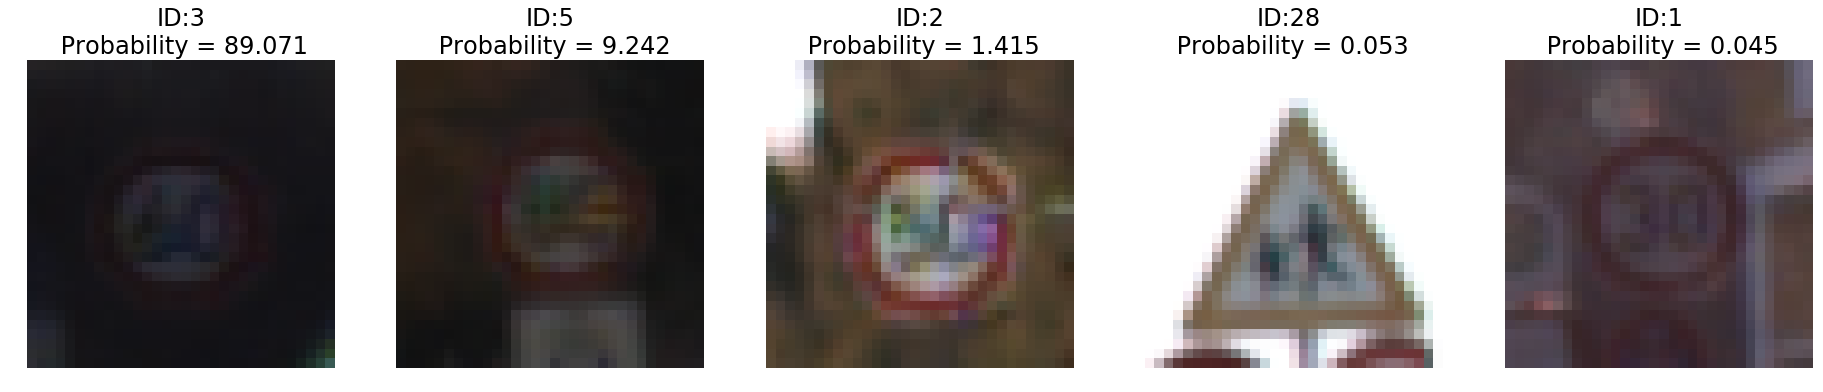

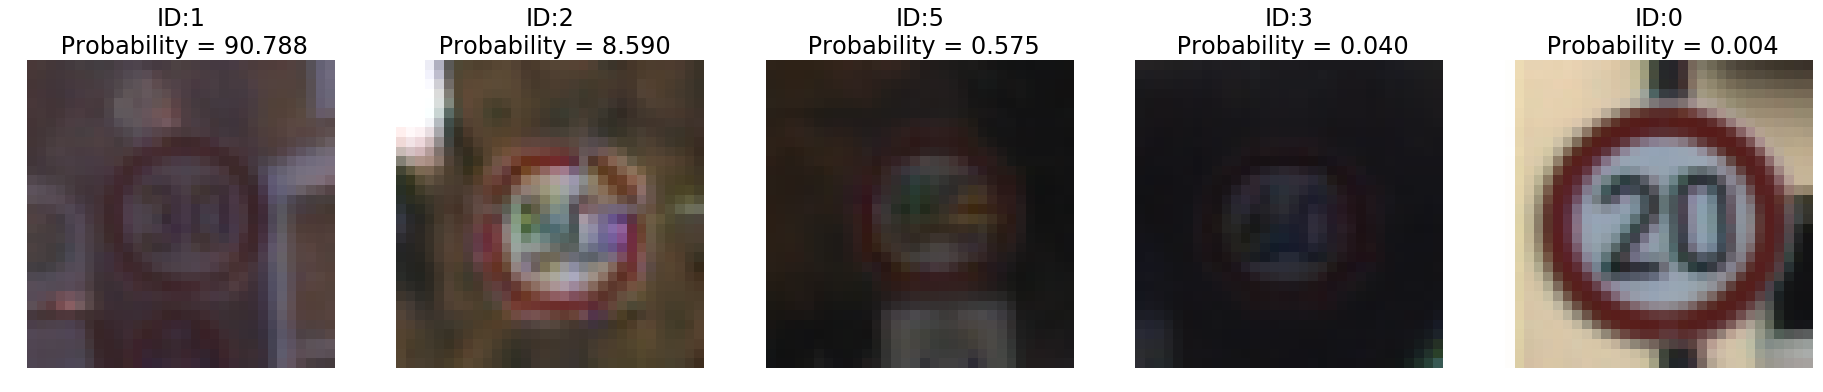

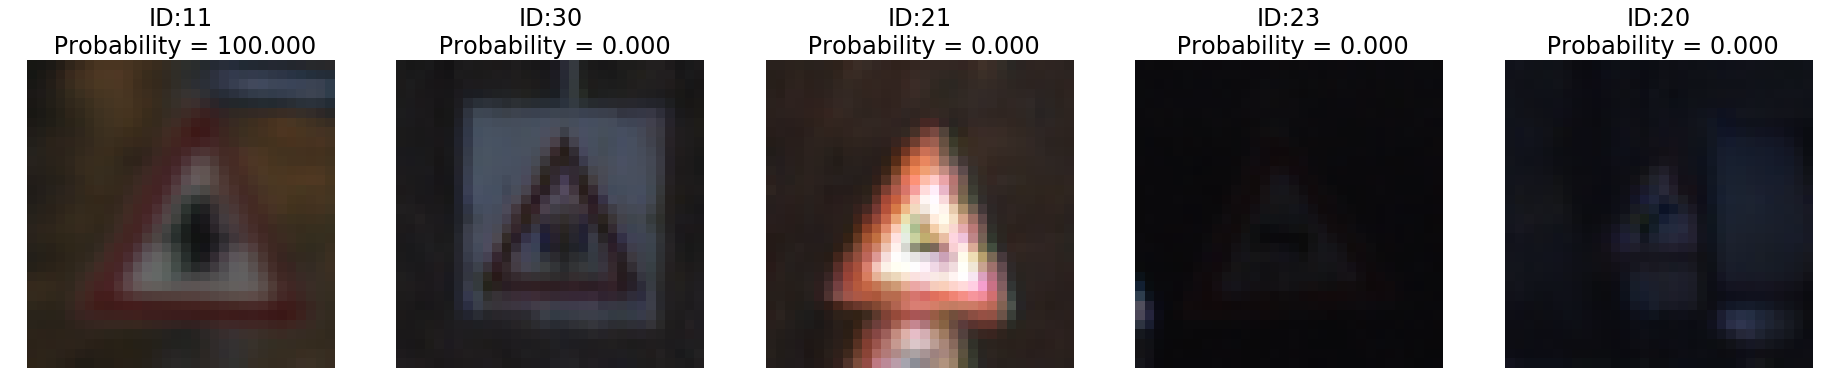

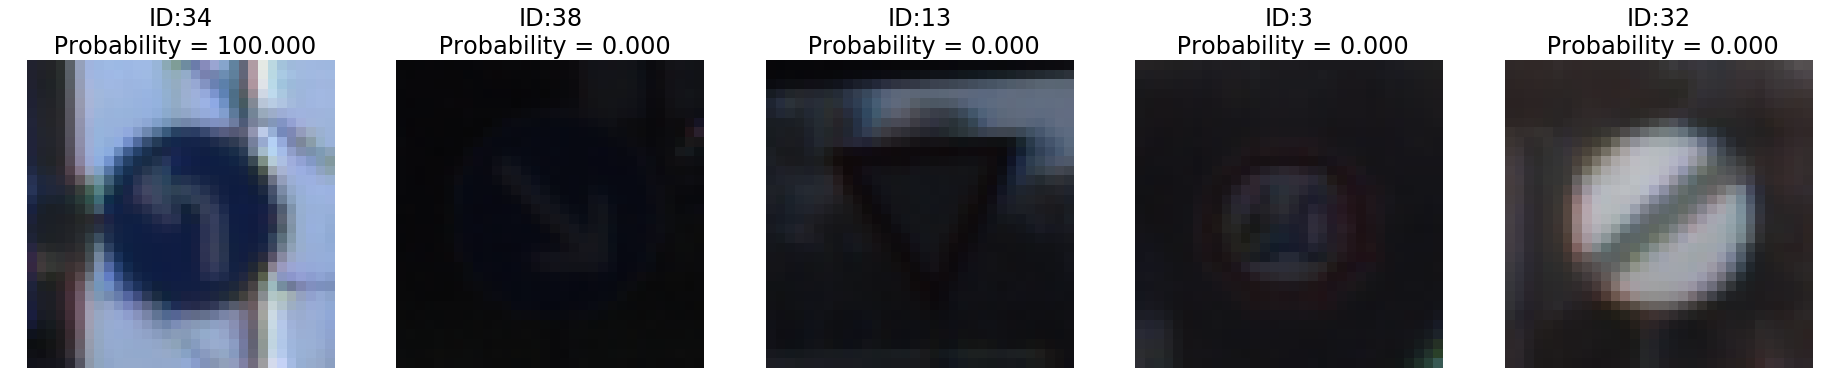

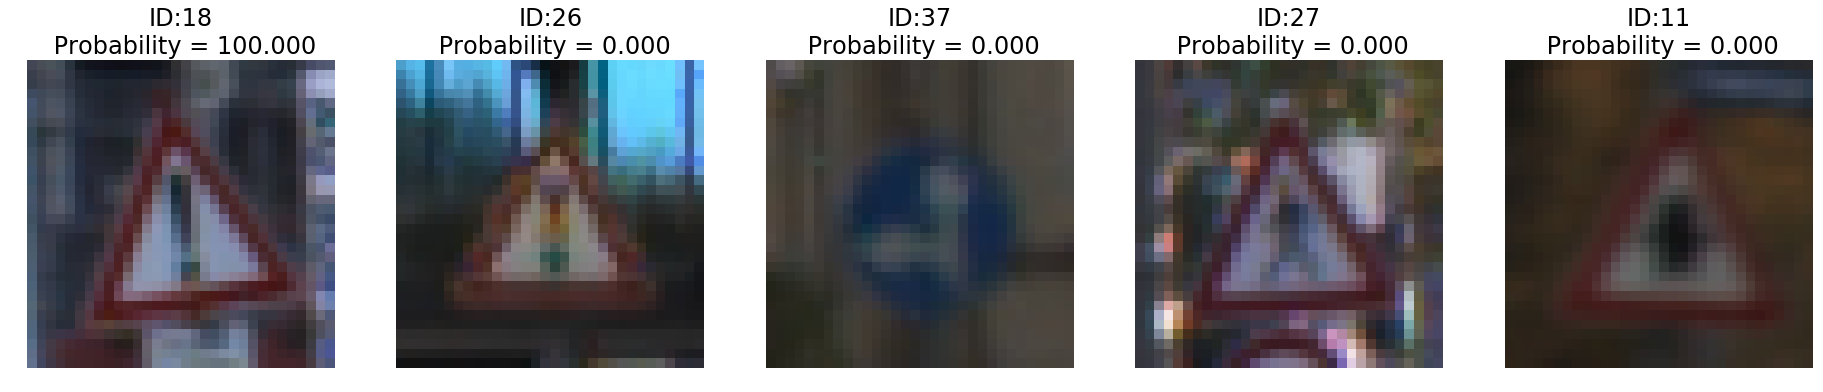

18 26 37 27 11


In [50]:
### Print out the top five softmax probabilities for the predictions on the German traffic sign images found on the web. 
### Feel free to use as many code cells as needed.

softmax_logits = tf.nn.softmax(logits)
top_k = tf.nn.top_k(softmax_logits, k=5)

fig=plt.figure(figsize=(32, 32))

with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())

    saver.restore(sess, tf.train.latest_checkpoint('.'))
    my_softmax_logits = sess.run(softmax_logits, feed_dict={x: my_signs_normalized, keep_prob1: 1.0, keep_prob2: 1.0 })
    my_top_k = sess.run(top_k, feed_dict={x: my_signs_normalized, keep_prob1: 1.0, keep_prob2: 1.0})
    
    %matplotlib inline
    
    j = 0
    for line in my_top_k[1]:
        plt.figure(figsize=(32, 32))
        for i in range(0, 5):
            plt.subplot(2, 5, i+1)
            x_selected = X_trainrgb[y_trainrgb == line[i]]
            plt.imshow(x_selected[0, :, :, :])
            label = ('ID:' + str(line[i]) + "\n " + "Probability = {:.3f}".format(my_top_k[0][j][i] * 100.0))
            plt.title(label, fontsize = '24')
            plt.axis('off')
        plt.show()
        j += 1
    print(*line)
            
            
            

### Project Writeup

Once you have completed the code implementation, document your results in a project writeup using this [template](https://github.com/udacity/CarND-Traffic-Sign-Classifier-Project/blob/master/writeup_template.md) as a guide. The writeup can be in a markdown or pdf file. 

> **Note**: Once you have completed all of the code implementations and successfully answered each question above, you may finalize your work by exporting the iPython Notebook as an HTML document. You can do this by using the menu above and navigating to  \n",
    "**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission.

---

## Step 4 (Optional): Visualize the Neural Network's State with Test Images

 This Section is not required to complete but acts as an additional excersise for understaning the output of a neural network's weights. While neural networks can be a great learning device they are often referred to as a black box. We can understand what the weights of a neural network look like better by plotting their feature maps. After successfully training your neural network you can see what it's feature maps look like by plotting the output of the network's weight layers in response to a test stimuli image. From these plotted feature maps, it's possible to see what characteristics of an image the network finds interesting. For a sign, maybe the inner network feature maps react with high activation to the sign's boundary outline or to the contrast in the sign's painted symbol.

 Provided for you below is the function code that allows you to get the visualization output of any tensorflow weight layer you want. The inputs to the function should be a stimuli image, one used during training or a new one you provided, and then the tensorflow variable name that represents the layer's state during the training process, for instance if you wanted to see what the [LeNet lab's](https://classroom.udacity.com/nanodegrees/nd013/parts/fbf77062-5703-404e-b60c-95b78b2f3f9e/modules/6df7ae49-c61c-4bb2-a23e-6527e69209ec/lessons/601ae704-1035-4287-8b11-e2c2716217ad/concepts/d4aca031-508f-4e0b-b493-e7b706120f81) feature maps looked like for it's second convolutional layer you could enter conv2 as the tf_activation variable.

For an example of what feature map outputs look like, check out NVIDIA's results in their paper [End-to-End Deep Learning for Self-Driving Cars](https://devblogs.nvidia.com/parallelforall/deep-learning-self-driving-cars/) in the section Visualization of internal CNN State. NVIDIA was able to show that their network's inner weights had high activations to road boundary lines by comparing feature maps from an image with a clear path to one without. Try experimenting with a similar test to show that your trained network's weights are looking for interesting features, whether it's looking at differences in feature maps from images with or without a sign, or even what feature maps look like in a trained network vs a completely untrained one on the same sign image.

<figure>
 <img src="visualize_cnn.png" width="380" alt="Combined Image" />
 <figcaption>
 <p></p> 
 <p style="text-align: center;"> Your output should look something like this (above)</p> 
 </figcaption>
</figure>
 <p></p> 


In [ ]:
### Visualize your network's feature maps here.
### Feel free to use as many code cells as needed.

# image_input: the test image being fed into the network to produce the feature maps
# tf_activation: should be a tf variable name used during your training procedure that represents the calculated state of a specific weight layer
# activation_min/max: can be used to view the activation contrast in more detail, by default matplot sets min and max to the actual min and max values of the output
# plt_num: used to plot out multiple different weight feature map sets on the same block, just extend the plt number for each new feature map entry

def outputFeatureMap(image_input, tf_activation, activation_min=-1, activation_max=-1 ,plt_num=1):
    # Here make sure to preprocess your image_input in a way your network expects
    # with size, normalization, ect if needed
    # image_input =
    # Note: x should be the same name as your network's tensorflow data placeholder variable
    # If you get an error tf_activation is not defined it may be having trouble accessing the variable from inside a function
    activation = tf_activation.eval(session=sess,feed_dict={x : image_input})
    featuremaps = activation.shape[3]
    plt.figure(plt_num, figsize=(15,15))
    for featuremap in range(featuremaps):
        plt.subplot(6,8, featuremap+1) # sets the number of feature maps to show on each row and column
        plt.title('FeatureMap ' + str(featuremap)) # displays the feature map number
        if activation_min != -1 & activation_max != -1:
            plt.imshow(activation[0,:,:, featuremap], interpolation="nearest", vmin =activation_min, vmax=activation_max, cmap="gray")
        elif activation_max != -1:
            plt.imshow(activation[0,:,:, featuremap], interpolation="nearest", vmax=activation_max, cmap="gray")
        elif activation_min !=-1:
            plt.imshow(activation[0,:,:, featuremap], interpolation="nearest", vmin=activation_min, cmap="gray")
        else:
            plt.imshow(activation[0,:,:, featuremap], interpolation="nearest", cmap="gray")